<a href="https://www.kaggle.com/code/thirumani/shark-tank-brasil-data-analysis?scriptVersionId=272877415" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## <p style="background-color:lightblue;color:white;font-size:24px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid #800080;"> SharkTank Brazil Exploratory Data Analysis (EDA) 🦈</p>
## Dataset https://www.kaggle.com/datasets/thirumani/sharktank-brasil-dataset

In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"), "with Python version")
!python --version

Notebook was last executed on: 2025-Nov-02 with Python version
Python 3.11.13


In [2]:
# Source: Wikipedia
IFrame('https://upload.wikimedia.org/wikipedia/pt/d/d8/Logotipo_Shark_Tank.jpg', width=390, height=275)

## ⚒️ Importing Required Python Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

## ⏳ Check and import dataset

In [4]:
! ls -l /kaggle/input/sharktank-brasil-dataset/
shark_tank = pd.read_csv('/kaggle/input/sharktank-brasil-dataset/Shark Tank Brasil dataset.csv')

nRow, nCol = shark_tank.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 52
-rw-r--r-- 1 nobody nogroup 52594 Nov  2 14:03 'Shark Tank Brasil dataset.csv'

There are 520 rows and 24 columns in the dataset


## 💵 Exploratory Data Analysis (EDA)

In [5]:
shark_tank.head(5)

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Loan,Deal Has Conditions,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Mentoring,Invested Shark Names
0,1,Gourmetzinho,1.0,1,10-Oct-2016,26-Jan-2017,10-Oct-2016,Food and Beverage,"Healthy, frozen baby food/meals for children",NaN,500000.0,20.0,2500000.0,1.0,600000.0,60.0,1000000.0,NaN,NaN,3.0,200000.00,20.00,NaN,"João Appolinário, Robinson Shiba, Sorocaba"
1,1,RevoFoot,1.0,2,10-Oct-2016,26-Jan-2017,10-Oct-2016,Health/Wellness,"Prosthetic feet, aiming for a lighter, more du...",NaN,400000.0,20.0,2000000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Velo,1.0,3,10-Oct-2016,26-Jan-2017,10-Oct-2016,Children/Education,"Bicycle parts, electric bikes and scooters",NaN,400000.0,20.0,2000000.0,1.0,400000.0,50.0,800000.0,NaN,NaN,2.0,200000.00,25.00,NaN,"Camila Farani, Cristiana Arcangeli"
3,1,BostaEmLata,1.0,4,10-Oct-2016,26-Jan-2017,10-Oct-2016,Business Services,"Organic fertilizer, product for urban gardeners",NaN,150000.0,30.0,500000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,M'AnaManutenção,2.0,5,10-Oct-2016,26-Jan-2017,17-Oct-2016,Technology/Software,platform/app for hiring female-led maintenance...,NaN,100000.0,10.0,1000000.0,1.0,100000.0,50.0,200000.0,NaN,NaN,3.0,33333.33,16.67,NaN,"Camila Farani, Cristiana Arcangeli, Robinson S..."


In [6]:
shark_tank.tail(10).T

,510,511,512,513,514,515,516,517,518,519
Season Number,10,10,10,10,10,10,10,10,10,10
Startup Name,MeuLabirinto,VimmActivewear,LojadoAvô,Malhacão,BRASolution,Hoomy,PretaPorter,Box24x7,FreshFemme,JhowBatata
Episode Number,8.0,8.0,9.0,9.0,9.0,10.0,10.0,11.0,11.0,11.0
Pitch Number,511,512,513,514,515,516,517,518,519,520
Season Start,22-Sep-2025,22-Sep-2025,22-Sep-2025,22-Sep-2025,22-Sep-2025,22-Sep-2025,22-Sep-2025,22-Sep-2025,22-Sep-2025,22-Sep-2025
Season End,10-Nov-2025,10-Nov-2025,10-Nov-2025,10-Nov-2025,10-Nov-2025,10-Nov-2025,10-Nov-2025,10-Nov-2025,10-Nov-2025,10-Nov-2025
Original Air Date,16-Oct-2025,16-Oct-2025,20-Oct-2025,20-Oct-2025,20-Oct-2025,23-Oct-2025,23-Oct-2025,27-Oct-2025,27-Oct-2025,27-Oct-2025
Industry,Health/Wellness,Fitness/Sports/Outdoors,Technology/Software,Fitness/Sports/Outdoors,Business Services,Lifestyle/Home,Liquor/Alcohol,Lifestyle/Home,Health/Wellness,Food and Beverage
Business Description,"rehabilitation for labyrinthitis, tinnitus, an...",activewear/fashion sports,"online store selling classic, nostalgic toys a...",fitness equipment and accessories for home gyms,specific industrial solution or product,"Bed, Bath, and Tableware items","beer brand with a strong identity, producing a...",micro-locations focused on promoting conscious...,intimate wipes and hygiene products specifical...,potato-based product
Company Website,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
shark_tank['Season Number'] = shark_tank['Season Number'].astype(pd.Int32Dtype())
shark_tank['Episode Number'] = shark_tank['Episode Number'].astype(pd.Int32Dtype())

# shark_tank['Original Ask Amount'] = shark_tank['Original Ask Amount'].astype(pd.Int32Dtype())

shark_tank['Startup Name'] = shark_tank['Startup Name'].astype(str)

In [8]:
shark_tank.sample(10).style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1px solid black", 'font-size': '10pt'})

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Loan,Deal Has Conditions,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Mentoring,Invested Shark Names
43,1,FolhaDaBananeira,11,44,10-Oct-2016,26-Jan-2017,19-Dec-2016,nan,nan,nan,200000.000000,20.000000,1000000.000000,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
184,4,AcarajéDaMila,1,185,28-Jun-2019,18-Oct-2019,28-Jun-2019,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
480,9,ProAthletic,16,481,16-Sep-2024,21-Nov-2024,7-Nov-2024,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
175,3,RioClaro,15,176,17-Aug-2018,21-Dec-2018,14-Dec-2018,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
365,7,Xibata16,4,366,25-Aug-2022,17-Nov-2022,15-Sep-2022,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
320,6,FitAnywhere,6,321,24-Sep-2021,17-Dec-2021,29-Oct-2021,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
515,10,Hoomy,10,516,22-Sep-2025,10-Nov-2025,23-Oct-2025,Lifestyle/Home,"Bed, Bath, and Tableware items",nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
430,8,SDWForAll,7,431,3-Oct-2023,12-Dec-2023,14-Nov-2023,Technology/Software,providing a Satellite-Derived Bathymetry (SDB) system,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
121,3,SoCute,2,122,17-Aug-2018,21-Dec-2018,24-Aug-2018,Beauty/Fashion,Fashion or accessories,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
251,5,MalokeroBurger,1,252,20-Nov-2020,26-Feb-2021,20-Nov-2020,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [9]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Season Number                520 non-null    Int32  
 1   Startup Name                 520 non-null    object 
 2   Episode Number               515 non-null    Int32  
 3   Pitch Number                 520 non-null    int64  
 4   Season Start                 520 non-null    object 
 5   Season End                   520 non-null    object 
 6   Original Air Date            515 non-null    object 
 7   Industry                     148 non-null    object 
 8   Business Description         142 non-null    object 
 9   Company Website              0 non-null      float64
 10  Original Ask Amount          84 non-null     float64
 11  Original Offered Equity      84 non-null     float64
 12  Valuation Requested          82 non-null     float64
 13  Got Deal            

In [10]:
shark_tank.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

,count,mean,std,min,25%,50%,75%,max
Season Number,520.000000,5.001923,2.753522,1.000000,3.000000,5.000000,7.000000,10.000000
Episode Number,515.000000,7.753398,4.445012,1.000000,4.000000,7.000000,11.000000,20.000000
Pitch Number,520.000000,260.500000,150.255338,1.000000,130.750000,260.500000,390.250000,520.000000
Company Website,0.000000,nan,nan,nan,nan,nan,nan,nan
Original Ask Amount,84.000000,971726.250000,2941893.527975,5.000000,200000.000000,300000.000000,500000.000000,20000000.000000
Original Offered Equity,84.000000,15.708333,9.336484,4.000000,10.000000,12.500000,20.000000,50.000000
Valuation Requested,82.000000,9897958.963415,45127290.356425,17.000000,1254999.750000,2000000.000000,5000000.000000,400000000.000000
Got Deal,150.000000,0.460000,0.500067,0.000000,0.000000,0.000000,1.000000,1.000000
Total Deal Amount,69.000000,285434.855072,199550.380716,5.000000,150000.000000,200000.000000,300000.000000,1000000.000000
Total Deal Equity,70.000000,26.235714,15.904316,0.000000,15.000000,20.000000,35.000000,60.000000


In [11]:
# Unique values in each column
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 10
Number of unique values in Startup Name - 518
Number of unique values in Episode Number - 20
Number of unique values in Pitch Number - 520
Number of unique values in Season Start - 10
Number of unique values in Season End - 10
Number of unique values in Original Air Date - 141
Number of unique values in Industry - 12
Number of unique values in Business Description - 142
Number of unique values in Company Website - 0
Number of unique values in Original Ask Amount - 31
Number of unique values in Original Offered Equity - 12
Number of unique values in Valuation Requested - 42
Number of unique values in Got Deal - 2
Number of unique values in Total Deal Amount - 16
Number of unique values in Total Deal Equity - 13
Number of unique values in Deal Valuation - 28
Number of unique values in Loan - 1
Number of unique values in Deal Has Conditions - 1
Number of unique values in Number of Sharks in Deal - 4
Number of unique values in Investment Amount

In [12]:
# Latest/current season data
shark_tank_recent = shark_tank.loc[(shark_tank['Season Number']==10)]

In [13]:
# Data set information
print(shark_tank['Season Number'].max(), "total seasons in Brazilian SharkTank\n")

10 total seasons in Brazilian SharkTank



Season Number   1   2   3   4   5   6   7   8   9   10
Episode Number  16  13  16  17  12  13  13  10  20  11


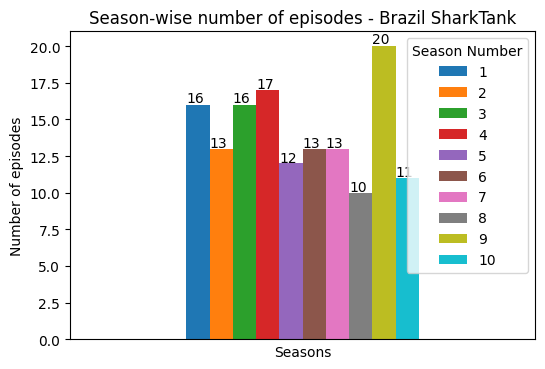

In [14]:
# Season-wise number of episodes
tmp = pd.pivot_table(shark_tank, values='Episode Number', columns='Season Number', aggfunc='max')
print(tmp)
ax = tmp.plot.bar(figsize=(6,4), title="Season-wise number of episodes - Brazil SharkTank")
plt.xlabel("Seasons")
plt.ylabel("Number of episodes")
plt.xticks([])
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

In [15]:
# Season-wise number of pitches
tmp = shark_tank['Season Number'].value_counts().sort_values()
fig = px.bar(tmp, x=tmp.values, title="<b> Shark Tank Brasil - Season-wise number of pitches</b>", template='plotly_white', text=tmp, width=560, height=400)
fig.update_yaxes(tickvals=list(range(11)))
fig.update_xaxes(visible=False)
fig.show(renderer="iframe")

In [16]:
# There were 2 to 5 pitches, in a each episode
print(shark_tank[['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())

[2 3 4 5]


In [17]:
# Types of industries, came for investments, in all seasons
tmp = shark_tank['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b> Brazil Shark Tank - Industry wise startups (in all seasons)</b>", template='simple_white', text=tmp, width=850, height=700)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show(renderer="iframe")

In [18]:
# Types of industries, came for investments, in current/latest season
tmp = shark_tank_recent['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b> Brasil Shark Tank - Industry wise startups (in current/latest 10th season)</b>", template='simple_white', text=tmp, width=850, height=700)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show(renderer="iframe")

In [19]:
# All seasons averages
pivot = pd.pivot_table(shark_tank, values=['Original Ask Amount','Total Deal Amount','Valuation Requested','Deal Valuation','Original Offered Equity','Total Deal Equity'], columns='Season Number', aggfunc=np.mean, sort=False)
pivot.style.format('{:.0f}')

# Amount & Valuation is in BRL and equity in %

Season Number,1,2,3,4,6,7,8,9,10
Original Ask Amount,770379,258889,350000,1000000,300000,3666667,nan,7750000,nan
Total Deal Amount,303095,236001,350000,1000000,300000,500000,214583,nan,311538
Valuation Requested,10065343,2257780,3500000,10000000,1750000,36666667,nan,nan,nan
Deal Valuation,695303,1316670,1750000,6666667,800000,2500000,1359722,nan,6991026
Original Offered Equity,15,19,10,10,18,10,nan,35,nan
Total Deal Equity,42,25,20,15,40,20,19,nan,15


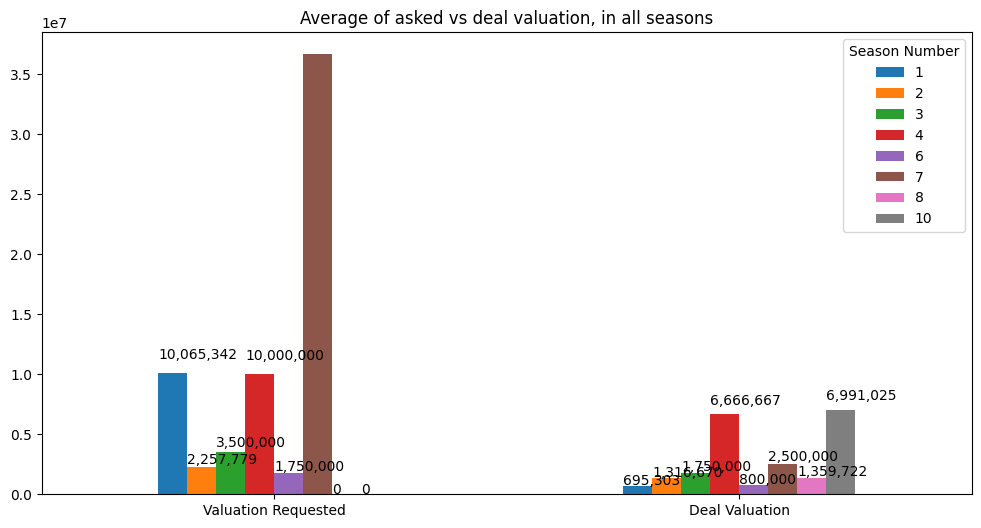

In [20]:
# All seasons average of offered/deal valuation
ax = pd.pivot_table(shark_tank, values=['Valuation Requested','Deal Valuation'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(12,6), title="Average of asked vs deal valuation, in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.12))

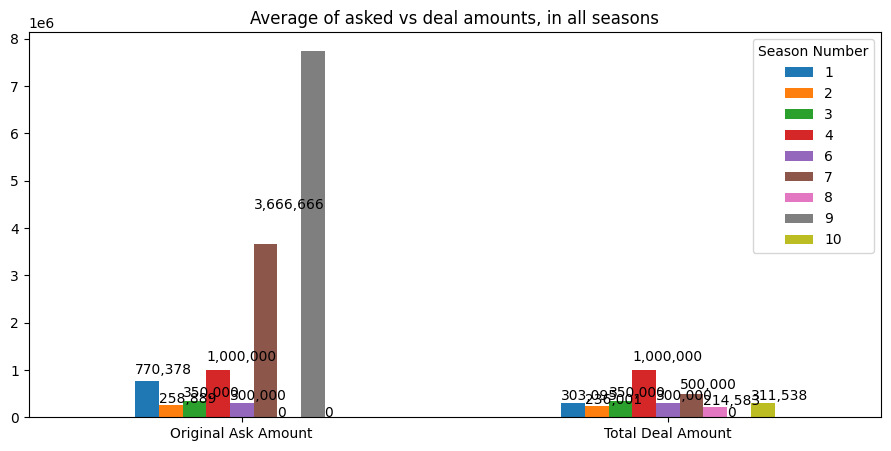

In [21]:
# All seasons average of offered/deal amounts
ax = pd.pivot_table(shark_tank, values=['Original Ask Amount','Total Deal Amount'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(11,5), title="Average of asked vs deal amounts, in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.2))

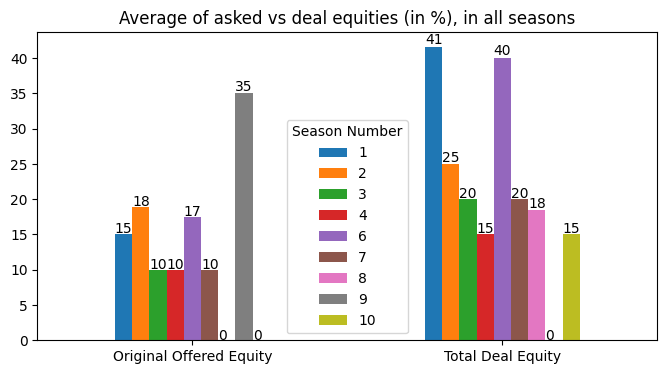

In [22]:
# All seasons average of offered/deal equities
ax = pd.pivot_table(shark_tank, values=['Original Offered Equity','Total Deal Equity'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(8,4), title="Average of asked vs deal equities (in %), in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

### 💹 40% companies received offers and 60% startups could not convince Sharks to invest

Got Deal
0.0    81
1.0    69
Name: count, dtype: int64 

Got Deal
0.0    54%
1.0    46%
Name: proportion, dtype: object


Text(0, 0.5, '')

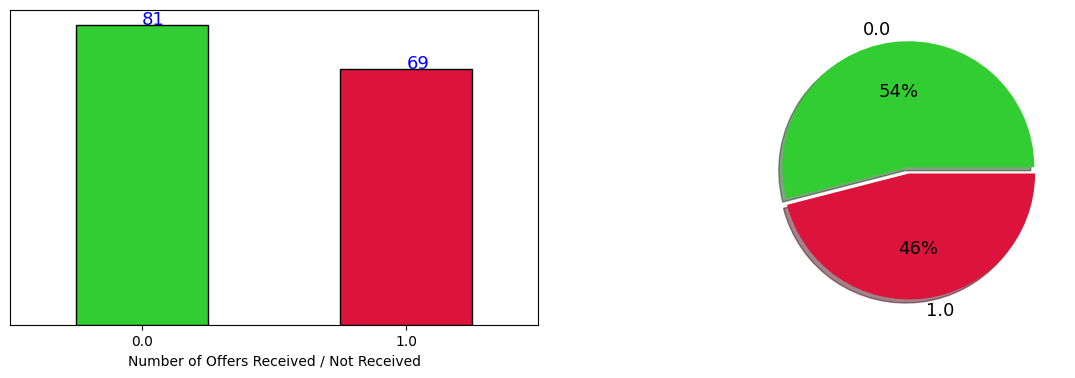

In [23]:
# Offers received
print(shark_tank['Got Deal'].value_counts(), "\n")
print(round(shark_tank['Got Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Got Deal"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Number of Offers Received / Not Received")
plt.yticks([])
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Got Deal"].value_counts()):
    plt.annotate(y, (x,y), fontsize=13, color="blue")
    
ax2 = plt.subplot(222)
shark_tank["Got Deal"].value_counts().plot(kind='pie', autopct='%.0f%%', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=13)
plt.ylabel('')

# 69 companies Got Deals & 81 startups could not convince #Sharks to invest.

In [24]:
# Maximum amount requested
print("Maximum amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].max(), 'BRL', locale='en_US').replace(".00", ""))

Maximum amount requested, by a pitcher - R$20,000,000


In [25]:
# Least amount requested
print("Least amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].min(), 'BRL', locale='en_US').replace(".00", ""))

Least amount requested, by a pitcher - R$5


In [26]:
# Sum of investment amount asked, in Shark Tank Brasil
print("Sum of investment amount asked, by all startup companies, in Brazil Shark Tank -", format_currency(shark_tank['Original Ask Amount'].sum(), 'BRL', locale='en_US').replace(".00", ""))

Sum of investment amount asked, by all startup companies, in Brazil Shark Tank - R$81,625,005


In [27]:
# Amount invested by all sharks, in Brazil SharkTank
print("Amount invested by all sharks, in Shark Tank Brasil -", format_currency(shark_tank['Total Deal Amount'].sum(), 'BRL', locale='en_US').replace(".00", ""))

Amount invested by all sharks, in Shark Tank Brasil - R$19,695,005


In [28]:
# Top 15 investments, as per total investment/deal amount
print(shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(15))

shark_tank['Total Deal Amount in Millions'] = shark_tank['Total Deal Amount']/1000000
tmpdf = shark_tank.sort_values('Total Deal Amount in Millions', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount in Millions', color="Startup Name", title="Highest investment as per deal amount (in millions)", text=tmpdf['Total Deal Amount in Millions'].map(float).map(str))
fig.show(renderer="iframe")

#  has biggest deal in #SharkTankBrasil history

Startup Name
DeixaQueEuPago        1000000.0
Mombak                1000000.0
TressCabelos          1000000.0
Gourmetzinho           600000.0
B.Craftsman            500000.0
Credere                500000.0
HumanRobotics          500000.0
Insider                500000.0
LevaMotors             500000.0
OncoAI                 500000.0
PeterPaivaSaboaria     500000.0
Ride2Play              500000.0
NaturalScience         400000.0
PiscinApp              400000.0
Velo                   400000.0
Name: Total Deal Amount, dtype: float64


In [29]:
# Top 20 investments, as per total equity/shares percentage diluted
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(20))

tmpdf = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:20]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest investment as per equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show(renderer="iframe")

Startup Name
Gourmetzinho          60.0
PiscinApp             60.0
Tagine                60.0
BanhoBungee           50.0
Bodout                50.0
BordaELenha           50.0
CadeirinhaSmart       50.0
Cartooneria           50.0
GoleiroDeAluguel      50.0
Kuba                  50.0
M'AnaManutenção       50.0
NaturalScience        50.0
PeterPaivaSaboaria    50.0
TressCabelos          50.0
Velo                  50.0
Vent7                 50.0
QGFoodTruck           40.0
Enlite                35.0
Naked                 35.0
Robotron              33.0
Name: Total Deal Equity, dtype: float64


In [30]:
# Startups who sold exactly 1/3rd of their company (equity) to Sharks
print(shark_tank.loc[shark_tank['Total Deal Equity'] == 33][["Startup Name"]].count())
print(shark_tank.loc[shark_tank['Total Deal Equity'] == 33][["Season Number","Startup Name", "Total Deal Equity"]])

tmpdf = shark_tank.loc[shark_tank['Total Deal Equity'] == 33]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Startups who sold 1/3rd of their company", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show(renderer="iframe")

Startup Name    1
dtype: int64
    Season Number Startup Name  Total Deal Equity
72              2     Robotron               33.0


In [31]:
# Startups who sold more than 1/3rd of their company (equity) to Sharks
print(shark_tank.loc[shark_tank['Total Deal Equity'] > 32 ][["Startup Name"]].count())
print(shark_tank.loc[shark_tank['Total Deal Equity'] > 32 ][["Season Number","Startup Name", "Total Deal Equity"]])

tmpdf = shark_tank.loc[shark_tank['Total Deal Equity'] > 32 ].sort_values('Total Deal Equity', ascending=False)
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Startups who sold more than 1/3rd of their company", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show(renderer="iframe")

Startup Name    20
dtype: int64
     Season Number        Startup Name  Total Deal Equity
0                1        Gourmetzinho               60.0
2                1                Velo               50.0
4                1     M'AnaManutenção               50.0
7                1  PeterPaivaSaboaria               50.0
9                1              Enlite               35.0
24               1         QGFoodTruck               40.0
27               1        TressCabelos               50.0
29               1               Vent7               50.0
36               1    GoleiroDeAluguel               50.0
38               1                Kuba               50.0
42               1              Bodout               50.0
45               1              Tagine               60.0
46               1               Naked               35.0
50               1         Cartooneria               50.0
54               1      NaturalScience               50.0
59               1     CadeirinhaSmart  

## SharkTank America/USA statistics & data analysis https://kaggle.com/code/thirumani/shark-tank-us-data-analysis

In [32]:
# Deals with conditions
print("Number of startups who accepted conditional deals", shark_tank['Deal Has Conditions'].count(),"\n")

shark_tank.loc[shark_tank['Deal Has Conditions'] == 'yes'][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]]

Number of startups who accepted conditional deals 2 



,Season Number,Startup Name,Total Deal Amount,Total Deal Equity
46,1,Naked,300000.0,35.0
72,2,Robotron,330000.0,33.0


## 💰 Which shark invested most ?

In [33]:
# # Amount Invested by sharks, in all seasons
# Amount = [(shark_tank['Steve Investment Amount']/1000000).sum(), (shark_tank['Janine Investment Amount']/1000000).sum(), (shark_tank['Andrew Investment Amount']/1000000).sum(), (shark_tank['Naomi Investment Amount']/1000000).sum(),
#     (shark_tank['Glen Investment Amount']/1000000).sum(), (shark_tank['Guest Investment Amount']/1000000).sum()]
# name=['Steve','Janine','Andrew','Naomi','Glen','Guests']
# df = {'Name':name, 'Total Amount':Amount}
# plt.figure(figsize=(10,4))
# plt.bar(df['Name'], df['Total Amount'])
# plt.xticks(fontsize=15)
# plt.yticks([])
# for index,d in enumerate(Amount):
#     plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
# plt.title("Total investment amount (in millions) by Sharks, in all seasons", fontsize=15)
# plt.show()

In [34]:
# # Equity received by sharks, in all seasons
# Equity = [shark_tank['Steve Investment Equity'].sum(), shark_tank['Janine Investment Equity'].sum(), shark_tank['Andrew Investment Equity'].sum(), shark_tank['Naomi Investment Equity'].sum(),
#     shark_tank['Glen Investment Equity'].sum(), shark_tank['Guest Investment Equity'].sum()]
# df = {'Name':name, 'Total Equity':Equity}
# plt.figure(figsize=(10,4))
# plt.bar(df['Name'], df['Total Equity'], color='g')
# plt.xticks(fontsize=15)
# plt.yticks([])
# for index,d in enumerate(Equity):
#     plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
# plt.title("Total equity received (in %), by Sharks, in all companies, in all seasons", fontsize=15)
# plt.show()

In [35]:
# # Number of companies invested, in all seasons
# Amount = [(shark_tank['Steve Investment Amount']).count(), (shark_tank['Janine Investment Amount']).count(), (shark_tank['Andrew Investment Amount']).count(), (shark_tank['Naomi Investment Amount']).count(),
#     (shark_tank['Glen Investment Amount']).count(), (shark_tank['Guest Investment Amount']).count()]
# df = {'Name':name, 'Total Amount':Amount}
# plt.figure(figsize=(10,4))
# plt.bar(df['Name'], df['Total Amount'], color='pink')
# plt.xticks(fontsize=15)
# plt.yticks([])
# for index,d in enumerate(Amount):
#     plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
# plt.title("Total number of companies invested, by Sharks, in all seasons", fontsize=15)
# plt.show()

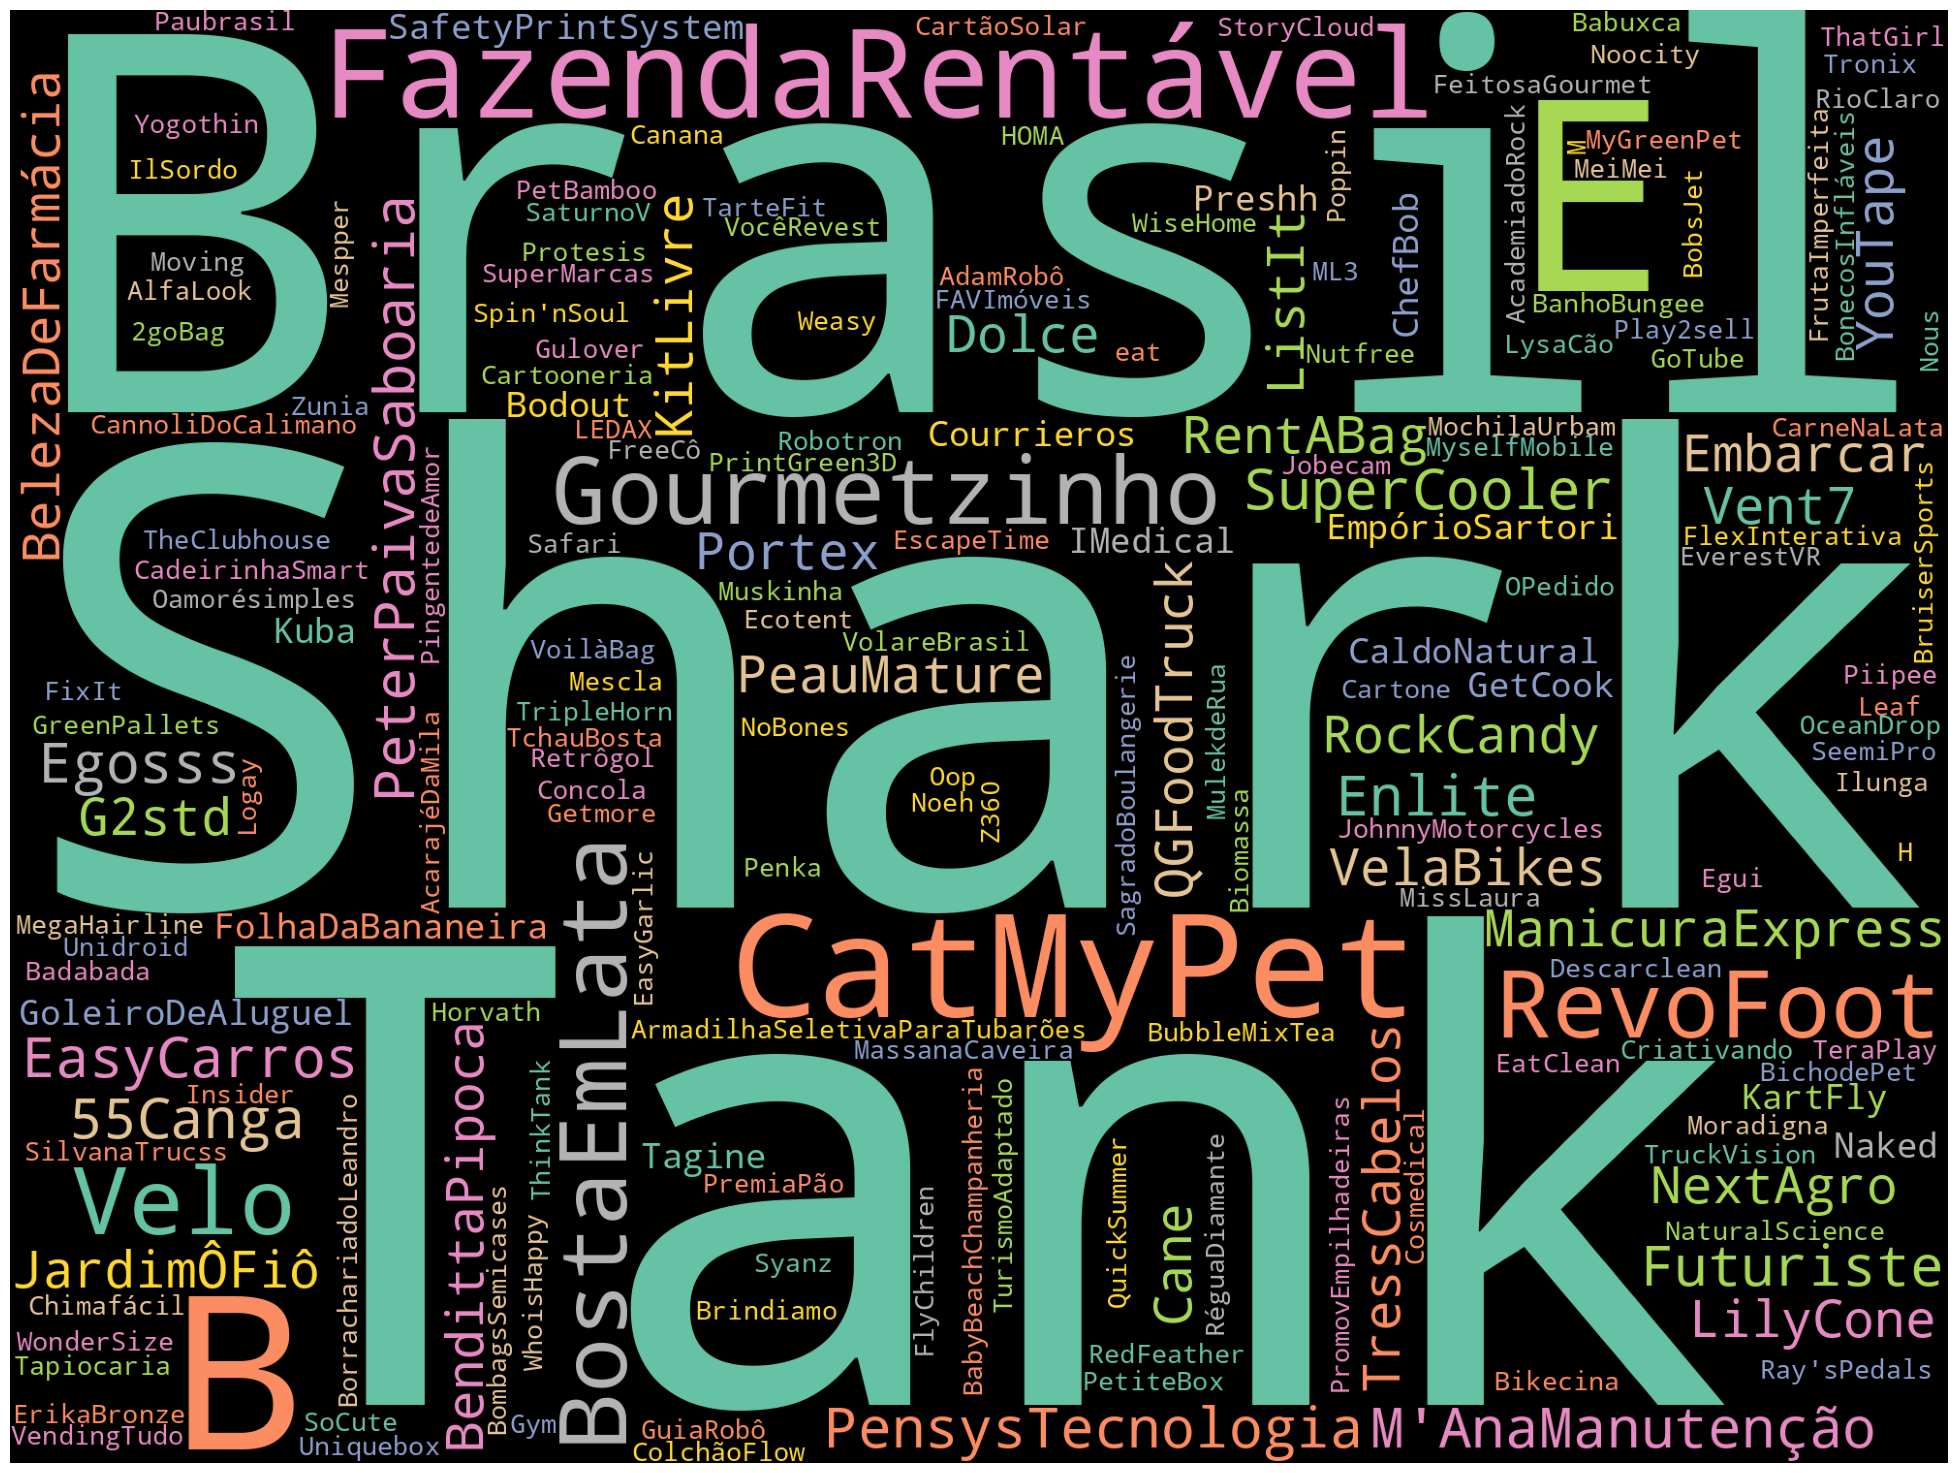

In [36]:
# Word cloud based on Startup Names, in all seasons
text = " Shark Tank Brasil ".join(cat for cat in shark_tank['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2025).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

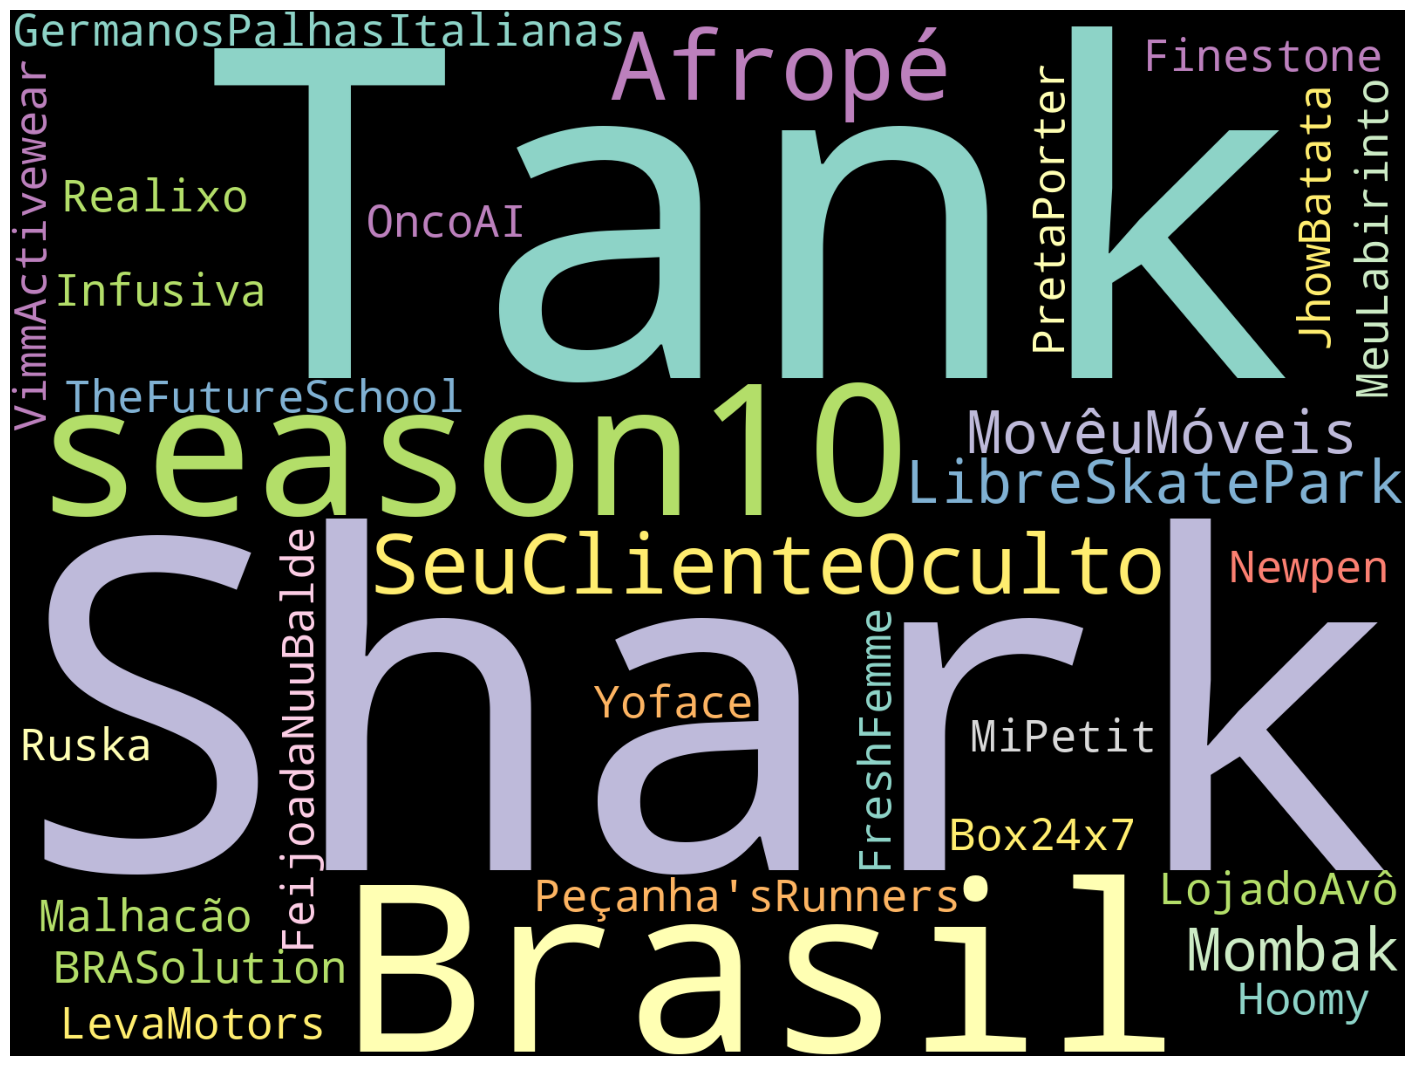

In [37]:
# Word cloud based on Startup Names, in current/latest season (10th season)
text = " Shark Tank Brasil season10 ".join(cat for cat in shark_tank_recent['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=1600, height=1200, stopwords=stop_words, background_color='black', colormap='Set3', collocations=False, random_state=2025).generate(text)
plt.figure(figsize=(18,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 🔎 Shark Tank India Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-india

Number of Sharks in Deal
1.0    52
2.0    11
3.0     6
5.0     1
Name: count, dtype: int64 

Number of Sharks in Deal
1.0    74%
2.0    16%
3.0     9%
5.0     1%
Name: proportion, dtype: object


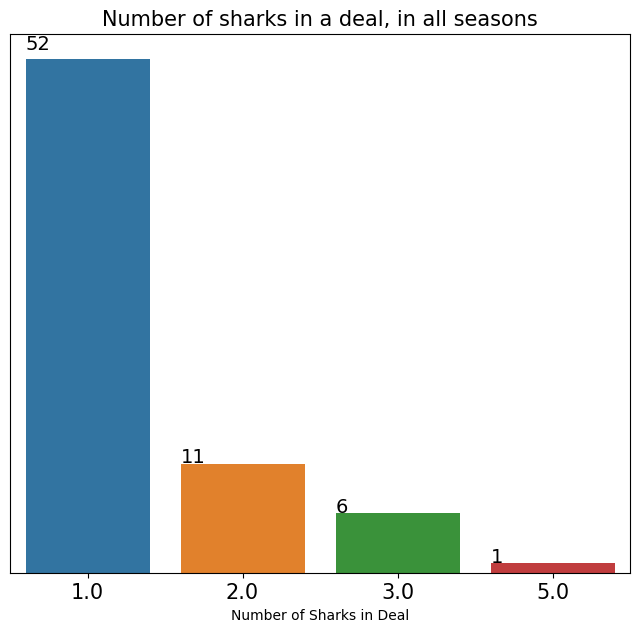

In [38]:
# Number of sharks in a deal, in all seasons
print(shark_tank['Number of Sharks in Deal'].value_counts(), "\n")

# In percentage
print(round(shark_tank['Number of Sharks in Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(8, 7))
plt.title("Number of sharks in a deal, in all seasons", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
ax = sns.countplot(data = shark_tank, x = 'Number of Sharks in Deal')
ax.set_ylabel('')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

In [39]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of Sharks in Deal'] >= 5][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]])

    Season Number Startup Name  Total Deal Amount  Total Deal Equity
65              1    Moradigna           300000.0                0.0


In [40]:
# Most frequently asked amount, by startups
shark_tank.groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (BRL) and Number of times asked

Original Ask Amount
300000.0    12
500000.0    11
400000.0     9
200000.0     8
150000.0     5
100000.0     4
250000.0     4
50000.0      3
350000.0     3
600000.0     2
dtype: int64

In [41]:
# Most frequently offered equity, by startups
shark_tank.groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number of times offered

Original Offered Equity
10.0    26
20.0    15
15.0    11
5.0      9
30.0     9
25.0     4
8.0      3
7.0      2
40.0     2
4.0      1
dtype: int64

In [42]:
# ✅ Most frequently invested amount, by Sharks
shark_tank.groupby('Total Deal Amount').size().nlargest(10)

# Total Deal Amount (BRL) and Number of times invested

Total Deal Amount
150000.0     16
200000.0     14
300000.0     10
500000.0      8
250000.0      4
100000.0      3
400000.0      3
1000000.0     3
5.0           1
50000.0       1
dtype: int64

In [43]:
# ✅ Most frequently received total equity, by Sharks
shark_tank.groupby('Total Deal Equity').size().nlargest(10)

# Total Deal Equity (in %) and Number of times invested

Total Deal Equity
15.0    15
50.0    13
20.0    12
10.0     9
25.0     7
30.0     4
60.0     3
35.0     2
0.0      1
1.5      1
dtype: int64

In [44]:
# Many (5) companies got more amount than they asked/expected
print(shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Startup Name"]].count())
shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount"]]

Startup Name    5
dtype: int64


,Season Number,Startup Name,Original Ask Amount,Total Deal Amount
0,1,Gourmetzinho,500000.0,600000.0
8,1,Futuriste,185000.0,200000.0
12,1,Egosss,250000.0,300000.0
29,1,Vent7,200000.0,300000.0
62,1,BanhoBungee,100000.0,150000.0


In [45]:
# Most of the companies diluted/gave their company equity more than they initially offered/expected
shark_tank.loc[shark_tank['Original Offered Equity'] < shark_tank["Total Deal Equity"]][["Season Number","Startup Name","Original Offered Equity","Total Deal Equity"]]

,Season Number,Startup Name,Original Offered Equity,Total Deal Equity
0,1,Gourmetzinho,20.0,60.0
2,1,Velo,20.0,50.0
4,1,M'AnaManutenção,10.0,50.0
7,1,PeterPaivaSaboaria,20.0,50.0
8,1,Futuriste,15.0,25.0
9,1,Enlite,5.0,35.0
27,1,TressCabelos,5.0,50.0
29,1,Vent7,10.0,50.0
34,1,GetCook,10.0,30.0
36,1,GoleiroDeAluguel,25.0,50.0


In [46]:
# Below (3) companies got the same valuation they requested (with or without loan)
print(shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Startup Name"]].count())
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name    3
dtype: int64


,Season Number,Startup Name,Valuation Requested,Deal Valuation
20,1,BelezaDeFarmácia,1000000.0,1000000.0
24,1,QGFoodTruck,450000.0,450000.0
68,2,AlfaLook's,17.0,17.0


In [47]:
# There are 2 companies which got more valuation than they pitched
print(shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Startup Name"]].count())
shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name    2
dtype: int64


,Season Number,Startup Name,Valuation Requested,Deal Valuation
12,1,Egosss,1666667.0,2000000.0
62,1,BanhoBungee,250000.0,300000.0


In [48]:
# Correlation matrix
shark_tank.corr(numeric_only=True).style.background_gradient(cmap = 'Blues')

,Season Number,Episode Number,Pitch Number,Company Website,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Total Deal Amount in Millions
Season Number,1.000000,-0.062828,0.992064,nan,0.325190,0.160818,0.062410,0.184495,-0.082533,-0.639997,0.193293,-0.294244,0.064528,-0.535768,-0.082533
Episode Number,-0.062828,1.000000,0.032497,nan,-0.091778,-0.054277,-0.063415,-0.140159,-0.102864,0.126932,-0.145733,0.005618,-0.068289,0.327908,-0.102864
Pitch Number,0.992064,0.032497,1.000000,nan,0.297634,0.141723,0.040407,0.187981,-0.091731,-0.644165,0.175539,-0.282721,0.046917,-0.531948,-0.091731
Company Website,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Original Ask Amount,0.325190,-0.091778,0.297634,nan,1.000000,0.125025,0.941068,-0.155751,0.992892,-0.102979,0.754674,0.192003,0.729100,-0.113609,0.992892
Original Offered Equity,0.160818,-0.054277,0.141723,nan,0.125025,1.000000,-0.182587,0.109072,-0.315311,0.381166,-0.372131,-0.192618,-0.297994,0.311029,-0.315311
Valuation Requested,0.062410,-0.063415,0.040407,nan,0.941068,-0.182587,1.000000,-0.123193,0.828633,-0.165248,0.625580,0.074724,0.761635,-0.070190,0.828633
Got Deal,0.184495,-0.140159,0.187981,nan,-0.155751,0.109072,-0.123193,1.000000,-0.008916,0.200022,0.035129,-0.571426,0.116505,0.190324,-0.008916
Total Deal Amount,-0.082533,-0.102864,-0.091731,nan,0.992892,-0.315311,0.828633,-0.008916,1.000000,0.018280,0.528495,0.244011,0.802756,-0.091260,1.000000
Total Deal Equity,-0.639997,0.126932,-0.644165,nan,-0.102979,0.381166,-0.165248,0.200022,0.018280,1.000000,-0.261401,0.164721,-0.112983,0.771945,0.018280


In [49]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))
import plotly
print("plotly version: {}". format(plotly.__version__))

# Current Python package versions
# numpy version: 1.26.4
# pandas version: 2.2.3
# matplotlib version: 3.7.2
# seaborn version: 0.12.2
# plotly version: 5.24.1

numpy version: 1.26.4
pandas version: 2.2.3
matplotlib version: 3.7.2
seaborn version: 0.12.2
plotly version: 5.24.1


## Data set values verification (you can ignore below section)
##### below queries should not return any rows

In [50]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Total Deal Amount'].isnull())]

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Loan,Deal Has Conditions,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Mentoring,Invested Shark Names,Total Deal Amount in Millions
45,1,Tagine,11,46,10-Oct-2016,26-Jan-2017,19-Dec-2016,NaN,food truck loan,NaN,250000.0,30.0,833333.0,1.0,NaN,60.0,0.0,yes,NaN,1.0,0.0,60.0,NaN,Robinson Shiba,NaN


In [51]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Total Deal Equity'].isnull())]

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Loan,Deal Has Conditions,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Mentoring,Invested Shark Names,Total Deal Amount in Millions


In [52]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Deal Valuation'].isnull())]

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Loan,Deal Has Conditions,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Mentoring,Invested Shark Names,Total Deal Amount in Millions


In [53]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Number of Sharks in Deal'].isnull())]

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Loan,Deal Has Conditions,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Mentoring,Invested Shark Names,Total Deal Amount in Millions


In [54]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Investment Amount Per Shark'].isnull())]

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Loan,Deal Has Conditions,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Mentoring,Invested Shark Names,Total Deal Amount in Millions


In [55]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Equity Per Shark'].isnull())]

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Loan,Deal Has Conditions,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Mentoring,Invested Shark Names,Total Deal Amount in Millions


In [56]:
shark_tank.loc[(shark_tank['Got Deal'] == 0) & (shark_tank['Invested Shark Names'].notnull())]

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Loan,Deal Has Conditions,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Mentoring,Invested Shark Names,Total Deal Amount in Millions
65,1,Moradigna,16,66,10-Oct-2016,26-Jan-2017,26-Jan-2017,Lifestyle/Home,"business that provides fast, low-cost home ren...",NaN,300000.0,10.0,3000000.0,0.0,300000.0,0.0,0.0,yes,NaN,5.0,60000.0,0.0,NaN,"João Appolinário, Cristiana Arcangeli, Robinso...",0.3
